# Método dos Mínimos Quadrados (MMQ)

## License

All content can be freely used and adapted under the terms of the 
[Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)

## Imports

Coloque **todos** os `import` na célula abaixo. Não se esqueça do `%matplotlib inline` para que os gráficos apareçam no notebook.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## IMPORTANTE

Agora que vocês sabem técnicas de programação defensiva, eu espero que todo o código que vocês fizerem abaixo utilizem essas técnicas. Crie docstrings para suas funções, cheque as entradas (quando for possível) e cheque as saídas. **Não esqueçam dos comentários**.

## Fabricando dados para teste

Para saber se nosso código está funcionando, precisamos fabricar alguns dados com parâmetros conhecidos. Vamos gerar dados que seguem a equação da reta:

$$
d_i = a x_i + b
$$

**IMPORTANTE**: Eu vou usar a biblioteca numpy as gerar os dados abaixo. 
Vocês **não podem** utilizar o numpy para calcular a sua solução.
Uso do numpy deve ser conquistado com ~~sangue~~esforço.
O código abaixo serve como exemplo do que vocês poderão fazer ao utilizar o Python no seu trabalho (fora da aula).

In [2]:
a = 10
b = 50
N = 50
# Vou utilizar a função linspace do numpy para facilitar a vida
# Essa função cria N valores igualmente espaçados entre dois números (5 e 50)
x = np.linspace(5, 50, N)
# Agora podemos usar os valores de x, a e b acima para simular dados observados
dados_obs = a*x + b
# Vamos adicionar erro aleatório aos dados para ficar mais interessante
# O erro seguirá uma distribuição normal com os seguintes parâmetros
media_erro = 0
std_erro = 20
# A linha abaixo faz com que os valores aleatórios não sejam verdadeiramente aleatórios
# veja https://en.wikipedia.org/wiki/Pseudorandom_number_generator
np.random.seed(42)
# Gera a lista de numéros aleatórios
erro = np.random.normal(loc=media_erro, scale=std_erro, size=len(dados_obs))
# Agora podemos adicionar o erro aos dados observados
dados_obs += erro

Utilize a célula abaixo para gerar um gráfico de círculos pretos (`ok`) de seus dados.

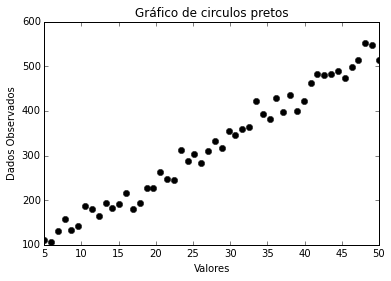

In [3]:
plt.figure() # Vamos criar um gráfico que consiga gerar círculos pretos com os nossos dados
plt.plot(x, dados_obs, "ok") # Plota os valores necessáriosno formato de bolas pretas.

plt.title("Gráfico de circulos pretos") # Vamos colocar um título no nosso gráfico.

plt.xlabel("Valores") # Dando nome ao eixo x.
plt.ylabel("Dados Observados") #dando nome ao eixo y

## Forma matricial da equação da reta e a matriz Jacobiana

Temos uma equação da reta para cada valor de $x_i$:

$$
\begin{align}
d_1 &= ax_1 + b \\
d_2 &= ax_2 + b \\
\vdots \\
d_N &= ax_N + b \\
\end{align}
$$

Esse sistema pode ser escrito de forma matricial com os parâmetros sendo $a$ e $b$:

$$
\begin{bmatrix}
d_1 \\ d_2 \\ \vdots \\ d_N 
\end{bmatrix} = 
\begin{bmatrix}
x_1 & 1 \\
x_2 & 1 \\
\vdots & \vdots \\
x_N & 1
\end{bmatrix}
\begin{bmatrix}
a \\ b
\end{bmatrix}
$$

$$
\bar{d} = \bar{\bar{A}}\bar{p}
$$

## Tarefa

Faça uma função chamada `jacobiana` que calcule e retorne a matrix Jacobiana ($\bar{\bar{A}}$). 

**Para pensar**: o que essa função deve receber como argumento? (**Dica**: ela só precisa de 1)

In [4]:
def jacobiana (x): #criando a função que retorna a matriz
    
    """
    Criando a matriz jacobiana
    """
    
    jacobiana = [] #criando uma lista vazia
    
    for i in range(N):
        jacobiana.append([x[i], 1]) #adicionando linhas da matriz (Xn, 1)
    return jacobiana
    

### Resultado esperado

A célula abaixo testa a sua Jacobiana contra uma produzida pelo numpy.

In [5]:
assert np.allclose(jacobiana(x), np.transpose([x, np.ones_like(x)]))

## Tarefa

Calcule dados preditos para o vetor de parâmetros definido abaixo **utilizando a forma matricial da equação**. Guarde o resultado em uma variável chamada `preditos`. 

Faça um gráfico dos dados observados (gerados acima) como pontos pretos e os dados preditos que você calculou como uma linha vermelha.

**Dica**: utilize as funções que você criou na aula passada.


In [6]:
p = [5, 15]

In [7]:
# Preciso criar uma função que consiga multiplicar uma matriz por um vetor, para isso uso o mvult.
def vmult(m, v):
    
    """
    Multiplica uma matriz por um vetor
    """
    assert len(m[0]) == len(v), 'Número de colunas da matriz diferente do número de linhas do vetor.'
   
    D = []  # Serve para criar uma lista vazia.
    
    for i in range(len(m)): # Serve para andar pelas linhas da matriz
        # Cria uma variavel que recebe o valor zero.
        soma = 0
        
        for k in range(len(m[0])): # Serve para andar pelas colunas da matriz
            
            soma = soma + (m[i][k] * v[k])  # Com isso, eu consigo multiplicar a matriz pelo vetor.
         
        D.append(soma) # Faz com que todos os meus resultados gerados fiquem na lista vazia.
    return D

In [8]:
#para plotar o gráfico, tenho que definir as minhas variáveis

jac = jacobiana(x) #atribuindo jbn a função jacobiana
preditos = vmult(jac, p) #atribuindo uma variável para a multiplicação, que sao os dados preditos

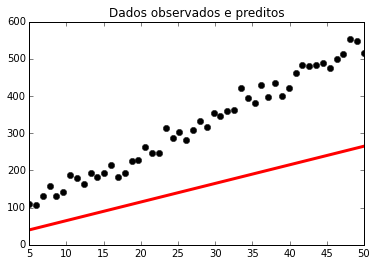

In [9]:
# Criando o gráfico.
plt.figure()

plt.plot(x, dados_obs, "ok") # Serve para plotar os valores das coordenadas do gráfico em pontos pretos.

plt.plot(x, preditos, "-r", linewidth=3) # Plota os valores das coordenadas x, y em uma linha vermelha.

plt.title("Dados observados e preditos") # Vou atribuir um título para o meu segundo gráfico.

### Resultado esperado

A célula abaixo testa seus resultados contra um calculado com o numpy.

In [10]:
assert np.allclose(preditos, np.dot(jacobiana(x), p))

O gráfico deve ser parecido com o abaixo:

![images/preditos-esperado.png](images/preditos-esperado.png)


## Sistema de equações normais

A solução de mínimos quadrados é o vetor $\bar{p}$ que resolve o sistema linear abaixo (chamado de sistema de equações normais):

$$
\bar{\bar{A}}^T\bar{\bar{A}}\bar{p} = \bar{\bar{A}}^T\bar{d}^o
$$

Para resolver esse sistema, precisamos primeiramente calcular a matriz do sistema $\bar{\bar{A}}^T\bar{\bar{A}}$ e o vetor do lado direito $\bar{\bar{A}}^T\bar{d}^o$.

## Tarefa

Faça uma função chamada `eqnormais_sistema` que calcule e retorne a matriz $\bar{\bar{A}}^T\bar{\bar{A}}$ dada a matriz Jacobiana.

Utilize as funções criadas na aula anterior.

**Dica**: É possível saber quantas linhas e colunas o sistema deve conter. Cheque se o seu resulatdo possui esse número.

In [11]:
#Para definição da matriz transposta usamos:

def mtrans (m):
    """
    Calcula a matriz transposta a partir de uma matriz qualquer.
    
    """
  
    for i in range(1, len(m[0]), 1):
        
        assert len(m[i]) == len(m[i - 1]), "Alguma linha da matriz não apresenta o mesmo número de elementos das outras"
        
    Tp = [] #criando uma lista vazia para colocar a Matriz Transposta
    for i in range(len(m[0])):#Serve para variar o número de colunas
        Y = []
        for j in range(len(m)):# serve para variar o numero de linhas
            Z = m[j][i] #serve para escolhem o elemento da coluna i, linha j
            Y.append(Z) #faz com que os resultados gerados fiquem na lista Y
        
        Tp.append(Y) #serve para os resultados gerados na lista Y fiquem na matriz transposta  
    return(Tp)     

  

# Para multiplicar as matrizes usamos:
def mult(m1, m2):

    """ 
    Multiplica duas matrizes
    """
    
    M = [] #criando outra lista vazia para guardar a multiplicação das matrizes
   
    for i in range(len(m1)):

        M.append([])
        for j in range(len(m2[0])):
            soma = 0
            for k in range(len(m1[0])):
                soma = soma + (m1[i][k]*m2[k][j])
            M[i].append(soma) #guardamos os resultados da multiplicação em C
    return M

In [12]:
# Para definir a função eqnormais_sistema:

def eqnormais_sistema(x):

    """
    Matriz transposta multiplicada pela matriz jacobiana
    """
   
    return mult(mtrans(x), x)

In [13]:
eqnormais_sistema(jacobiana(x))

[[46594.387755102049, 1375.0], [1375.0, 50]]

### Resultado esperado

A célula abaixo testa seus resultados contra um calculado com o numpy.

In [14]:
assert np.allclose(eqnormais_sistema(jacobiana(x)), np.transpose(jacobiana(x)).dot(jacobiana(x)))

## Tarefa

Faça uma função chamada `eqnormais_lado_direito` que calcule e retorne o vetor do lado direito do sistema de equações normais.

**Dicas**: 

* Essa função deve receber 2 argumentos. 
* O que essa função deve retornar é um vetor ou matriz?
* É possível saber o número de elementos que o resultado deve conter. Cheque esse número.

In [15]:
# Para criar a função eqnormais_lado_direito devemos usar:

def eqnormais_lado_direito(x,y):
  
    return vmult(mtrans(x), y) #vetor do lado direito

In [16]:
jaeq = mtrans(jac)

In [20]:
result = eqnormais_lado_direito(jac, dados_obs)

### Resultado esperado

A célula abaixo testa seus resultados contra um calculado com o numpy.

In [21]:
assert np.allclose(eqnormais_lado_direito(jacobiana(x), dados_obs), np.transpose(jacobiana(x)).dot(dados_obs))

In [22]:
#faltou checar o numero de elementos

## Solução de mínimos quadrados

Agora que temos o sistema de equações normais, podemos resolvê-lo numericamente para encontrar os valores de $a$ e $b$ que produzem a reta que melhor ajusta nossos dados.

## Tarefa

Faça uma função chamada `elim_gauss` que resolve um sistema de equações utilizando a eliminação de Gauss. Essa função deve receber como argumento a matriz do sistema e o vetor lado direito e retornar o vetor de solução.

**Dicas**:

* Cheque o número de elementos na matriz e no vetor.
* A matriz deve ser quadrada.

In [50]:
# Para definir a função devemos
def elim_gauss(A, x):
    """
    Faz o escalonamento para resolver o sistema linear
    """
    for k in range (0, len(A)-1, 1): # serve para variar dentro das linhas, ignorando a ultima linha.
        for i in range (k+1, len(A[0]), 1): #serve para variar dentro das colunas
            
            temp = -A[i][k]/A[k][k] # Criamos uma variável para guardar os resultados do escalonamento.
            
            for j in range (k, len(A), 1): #Serve para fazer o escalonamento
               
                A[i][j] = A[i][j] + A[k][j] * temp  # Escalona a matriz, multiplicando todos os elementos dela pela temp,
                                                    #e somando o resultado na proxima parte do matriz.

            x[i] = x[i] + x[k] * temp
# Para calcular o resultado do vetor do lado direito fazemos:
        vetor_dir = [0]*len(A)
    
    for k in range(len(A)-1, -1, -1): #serve para variar entre as linhas da matriz
    
        for i in range(len(A[0])-1, k, -1): #serve para variar entre as colunas da mesma matriz
               vetor_dir[k] = vetor_dir[k] + (vetor_dir[i]*A[k][i]) #chamamos o somatório de cada resultado de vetor_dir
   
        vetor_dir[k] = (x[k] - vetor_dir[k]) / A[k][k] 
    return vetor_dir

### Resultado esperado

A célula abaixo testa seus resultados contra um calculado com o numpy.

In [51]:
np.random.seed(42)
A_teste = np.random.uniform(10, 50, size=(21, 21))
x_teste = np.random.uniform(5, 20, size=21)
y_teste = A_teste.dot(x_teste)
assert np.allclose(elim_gauss(A_teste, y_teste), x_teste)

## Tarefa

Faça uma função `ajuste_reta` que recebe um vetor de valores de x e um de dados observados e retorna a solução de minimos quadrados $\bar{p}$ (vetor com os valores de $a$ e $b$ estimados).

Aplique essa função nos dados observados simulados acima. Cheque se a solução bate com o valor esperado (você pode fazer isso usando um `assert`). 

Faça um gráfico dos dados observados (pontos pretos) pelos dados preditos pela solução que você obteve agora (linha vermelha). O gráfico deve conter uma legenda. A legenda para os dados preditos deve ser da forma "y = 234x + 244" (trocando os números pelos valores que você estimou).

**Dica**:r

* Quantos elementos deve ter o vetor retornado?
* Para inserir números em uma string (texto): `"y = {}".format(123.1)"` $\to$ `"y = 123.1"`
* Para formatar os números que você quer inserir numa string: `"y = {:.4f}".format(123.242524536362446353436335)` $\to$  `"y = 123.2425"`

In [65]:
#Para definir a função ajuste_reta

def ajuste_reta(x, y):
    

    
    return elim_gauss(eqnormais_sistema(jacobiana(x)), eqnormais_lado_direito(jacobiana(x),y))
  
                                          


In [66]:
r = ajuste_reta(x, dados_obs)
print(r)

#y = a*x + b

[9.7422960022585752, 52.577381832766335]


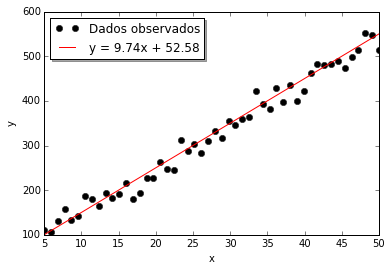

In [67]:
plt.figure()
#plotando x e y em pontos pretos.
plt.plot(x, dados_obs, "ok", label='Dados observados')
plt.plot(x, y, "-r", label='y = 9.74x + 52.58')
#para plotar a legenda:
legend = plt.legend(loc='upper left', shadow=True)

plt.xlabel("x")
plt.ylabel("y")

### Resultado esperado

Os valores estimados para $\bar{p}$ devem ser aproximadamente:

    [9.742296, 52.57738183]

O gráfico deve ser parecido com o abaixo:

![images/solucao-esperada.png](images/solucao-esperada.png)


## Tarefa Bônus


Podemos utilizar o  método dos mínimos quadrados para ajustar qualquer equação que seja linear com relação as parâmetros ($a$ e $b$ no caso da reta). Isso quer dizer que podemos ajustar uma parábola:

$$
d_i = ax_i^2 + bx + c
$$

Dessa vez, os parâmetros que queremos estimar são $a$, $b$ e $c$. Note que agora temos 3 parâmetros, não 2. Por isso, a Jacobiana terá 3 colunas ao invés de 2.

Faça ao menos as seguintes funções:

* `jacobiana_parabola`: calcula e retorna a matriz Jacobiana para o caso da parábola. Deve receber como argumento somente o vetor de coordenadas x.
* `ajuste_parabola`: calcula a solução de mínimos quadrados para o caso de uma parábola. Deve receber como argumento o vetor de coordenadas x e o vetor de dados. Deve retornar o vetor de parâmetros $\bar{p}$ estimado (contem os valores de $a$, $b$ e $c$)

Teste suas funções com os dados gerados abaixo. Note que estamos usando o mesmo vetor x. Gere gráficos dos dados fabricados e também dos dados preditos pela estimativa (como os que foram feitos acima).

O que acontece se você tentar ajustar uma reta aos dados da parábola? E se tentar ajustar uma parábola aos dados da reta?

**Dicas**:

* Você precisa criar outras funções para montar o sistema de equações normais e calcular a solução do sistema?

In [ ]:
a_par, b_par, c_par = 2, 20, 200
dados_parabola = a_par*x**2 + b_par*x + c_par + erro

### Resultado esperado

Os gráficos que você deve gerar deverão ser parecidos com os abaixo:

![images/bonus-dados.png](images/bonus-dados.png)
![images/bonus-ajuste.png](images/bonus-ajuste.png)